# **LSTM Exercise**

## Import libraries

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [ ]:
tf.random.set_seed(7)

In [ ]:
dataframe = pd.read_csv('/content/traffic (4).csv',usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
dataframe.head() # يعتبر ريقريشن

,Vehicles
0,15
1,13
2,10
3,7
4,9


## Normalize the dataset

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [ ]:
train_size = int(len(dataset) * 0.70) # تقسيم الترين والتيست
test_size = len(dataset) - train_size # اطرح عشان يعطيني قيمه التيست
# من 0 الى حجم الترين ومن المتبقي من التدريب الى نهايه البيانات
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test)) # طباعه عدد العينات في الترين والتيست

33684 14436


In [ ]:
#انشاء
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Fit the LSTM

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
33682/33682 - 71s - loss: 0.0017 - 71s/epoch - 2ms/step
Epoch 2/20
33682/33682 - 68s - loss: 7.6192e-04 - 68s/epoch - 2ms/step
Epoch 3/20
33682/33682 - 67s - loss: 7.6249e-04 - 67s/epoch - 2ms/step
Epoch 4/20
33682/33682 - 66s - loss: 7.6068e-04 - 66s/epoch - 2ms/step
Epoch 5/20
33682/33682 - 65s - loss: 7.6046e-04 - 65s/epoch - 2ms/step
Epoch 6/20
33682/33682 - 65s - loss: 7.6144e-04 - 65s/epoch - 2ms/step
Epoch 7/20
33682/33682 - 65s - loss: 7.6188e-04 - 65s/epoch - 2ms/step
Epoch 8/20
33682/33682 - 65s - loss: 7.5866e-04 - 65s/epoch - 2ms/step
Epoch 9/20
33682/33682 - 66s - loss: 7.5868e-04 - 66s/epoch - 2ms/step
Epoch 10/20
33682/33682 - 65s - loss: 7.5890e-04 - 65s/epoch - 2ms/step
Epoch 11/20
33682/33682 - 64s - loss: 7.5836e-04 - 64s/epoch - 2ms/step
Epoch 12/20
33682/33682 - 64s - loss: 7.5792e-04 - 64s/epoch - 2ms/step
Epoch 13/20
33682/33682 - 66s - loss: 7.5818e-04 - 66s/epoch - 2ms/step
Epoch 14/20
33682/33682 - 65s - loss: 7.5780e-04 - 65s/epoch - 2ms/step
Epoch

## Make preductuion and evaluatuin matrix.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

452/452 [==============================] - 1s 2ms/step
Train Score: 4.84 RMSE
Test Score: 5.45 RMSE


## Visualize the result

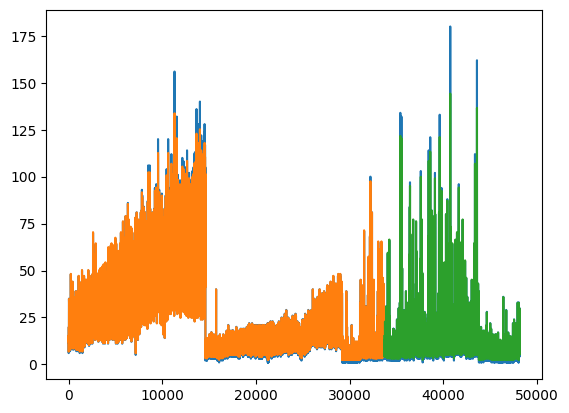

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Well done** :)